# Графы (сети), библиотека networkx

## Что такое графы?

Чтобы что-то научно исследовать, мы строим модель, то есть упрощённую схему, исследуемого предмета. Карта — модель пространства и того, что в нём находится, грамматическое описание -- модель реальной грамматической системы языка, а глоссированный текст — модель текста настоящего, произнесённого. В модель мы берём какие-то важные для нас данные, а другие отбрасываем, считая их неважными. Например, физики часто пренебрегают таким свойством предмета, как его размер, принимая во внимание только массу, скорость и ряд других характеристик, а сам объект считая "материальной точкой", то есть своего рода абстракцией (в реальности не может существовать предмет без пространственных характеристик). 

Частотный словарь — тоже модель, это модель реального текста, в которой мы важными параметрами, которые мы взяли в нашу модель, считаем сами слова и частоту их употребления. Но при этом мы отказываемся от ряда других характеристик, которые, на самом деле, даже важнее, чем частотность, — это связи между словами.

Кажется, что это касается не только текста, но и многих других объектов реальности: связи между элементами системы важнее количества этих элементов. Посмотрите на любой сложный механизм. Скажем, самолёт. Что лучше даст нам представление о том, как он устроен: список всех винтиков, панелей и шарниров с указанием, сколько раз каждый из них задействован в конструкциии, или точный чертёж, из которого будет ясно, акэти винтики и панели соединяются друг сдругом и соединяются в единую систему? Очевидно, что второе.

Модель, которая не только описывает элементы системы, но и фиксирует связи между ними, называется **графом** или **сетью**. В терминах графов может быть описана любая система, в которой можно выделить
1. элементы (в графе они называются *узлами = вершинами = nodes = vertices*)
2. связи между ними (они именуются *рёбрами = связями = edges = relations*).  

Самый близкий нам пример — социальная сеть (не просто же так она сеть), где пользователи — узлы,а наличие "дружбы" между пользователями — ребро. Чуть менее очевидные графы, с которыми мы сталкиваемся каждый день — метро и интернет.

<img src="https://raw.githubusercontent.com/ancatmara/DL-SFL-2019/master/assets/graph1.png" width="500" align="left">

<img src="https://camo.githubusercontent.com/7dae86f6e8a81d00b1e6dcf4ae5325c7440485ec/68747470733a2f2f616e6361746d6172612e676974626f6f6b732e696f2f6469676974616c2d6c697465726163792f636f6e74656e742f6173736574732f72737a5f696e7465726e65745f6e6574776f726b2e706e67" width="450" align="right">

## Зачем нужны графы?

Прежде всего, графы любят за то, что их можно визуализировать, и в результате получается красивая картинка:

![картинка с каким-то графом](http://cs5702.userapi.com/v5702562/5a9/FWZOC62-Ogk.jpg)

Действительно, визуальный анализ уже может дать довольно много, и рассматривание такой картинки в некотором смысле уже научная работа. 

Но не только. Рассматриванием картинок дело не ограничивается. Граф — это математический объект, в котором мы можем довольно много всего посчитать, и таким образом установить разные закономерности, доказать гипотезу. Это называется *сетевым анализом*. 

Для того, чтобы превращать данные (любые формализованные данные) в граф, можно использовать библиотеку `networkx`. [Вот ее документация](https://networkx.github.io/documentation/latest/index.html). Это не единственная библиотека для работы с графами в питоне ([вот полный список](https://wiki.python.org/moin/PythonGraphLibraries)), но, кажется, самая простая и удобная. 

# networkx

In [ ]:
!pip install networkx

In [1]:
import networkx as nx

## Создаем граф

Мы можем пойти двумя путями, в зависимости от того, положения, в котором находимся. Первая ситуация: у нас есть какие-то данные, и нам нужно превратить их в граф. Тогда уместно создать сначала пустой объект графа и туда постепенно что-то добавлять.

In [2]:
G = nx.Graph() # пустой граф
G.add_node(1) # добавляем один узел
G.add_nodes_from([2 ,3, 4, 5, 6, 7]) # добавляем несколько узлов сразу

G.remove_node(2) # впрочем, один узел лишний, его, пожалуй, удалим

# То, как мы обозначаем узлы (1, 2, 3 ...) — это их id. Но вообще-то мы можем приклеить к ним и человекопонятные ярлыки:
G.add_node(1, label="node_1")

Теперь укажем, какие узлы связаны между собой рёбрами.

In [3]:
G.add_edge(1,3) # ребро между узлами 1 и 3
G.add_edges_from([(1, 4), (1, 5), (3, 5), (4, 5), (1, 6), (1, 7)]) # сразу несколько рёбер

G.remove_edge(1, 5) # хотя одно ребро лишнее...

Посмотрим, что получилось.

In [4]:
print('узлы', G.nodes())
print('рёбра', G.edges())

узлы [1, 3, 4, 5, 6, 7]
рёбра [(1, 3), (1, 4), (1, 6), (1, 7), (3, 5), (4, 5)]


In [7]:
# Какие есть соседи у узла 1?

print([n for n in G.neighbors(1)])
G.neighbors(1) # это итератор

[3, 4, 6, 7]


In [8]:
# А сколько есть соседей у узла 5?
G.degree(5)

2

In [9]:
# А теперь узнаем число соседей (в терминах теории графов — степень, она же мощность) каждого узла
for node in G.nodes():
    print (node, G.degree(node))

1 4
3 2
4 2
5 2
6 1
7 1


Кроме того, что графы просто отражают связи между узлами, они могут включать и характер этой связи. Например, в теории графов выделяются специальные взвешенные графы, это такие, у которых между узлами не просто наличествует ребро, но у этого ребра ещё и есть вес. В реальности взвешенным графом, например, может быть граф персонажей какой-то пьесы, в котором мы учитываем не только то, что персонажи этой пьесы находятся вместе на сцене (ребро), но и сколько раз они вступают в диалог (вес ребра).

In [10]:
# вес ребра можно добавить так:
G.add_edge(1, 3, weight=4)

Отдельно выделяюся специальные направленные графы, где мы фиксируем не просто наличие и вес связи, но и её направление. Скажем, граф переписки нескольких отражает направление связи-письма, то есть, что именно X писал Y-ку, а не наоборот. Такой граф задаётся как специальный тип объекта:

In [11]:
dg = nx.DiGraph()
dg.add_weighted_edges_from([(1,4,0.5), (3,1,0.75)]) # от кого — кому и вес ребра

Итак, суммируем. Графы бывают:

* ориентированные и неориентированные (связи-стрелочки vs обычные связи)
* связные и несвязные (все узлы связаны vs есть узлы, которые оторваны от основного графа).
* взвешенные и невзвешенные (связи имеют некоторое числовое значение или нет)


## Сохраняем и подгружаем граф

Когда граф построен, его можно сохранить в каком-нибудь специальном формате. 

1. **csv**-таблица узлов/ребер
2. **gml** (*Graph Modelling Language*) — простейший текстовый формат записи графа
3. **graphml** — основанный на XML формат для записи графов
4. **gexf** (*Graph Exchange XML Format*) — таже основан на XML, позволяет описывать не только структуру и элементы графа, но и метаданные, иерархию, динамику — в общем, самый продвинутый формат.

Чтобы сохранить граф в виде файла в формате .gexf, достаточно вот такого кода:

In [10]:
nx.write_gexf(G, 'graph_file.gexf')

Загрузить данные из этого формата можно тоже одной строчкой:

In [11]:
G1 = nx.read_gexf('graph_file.gexf')

## Визуализация

Визуализируем граф с помощью уже знакомого нам `matplotlib`:


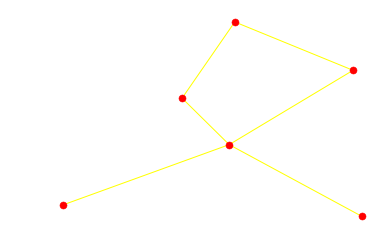

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

# для начала надо выбрать способ "укладки" графа. Их много, возьмём для начала такой:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
plt.show() # что получилось?

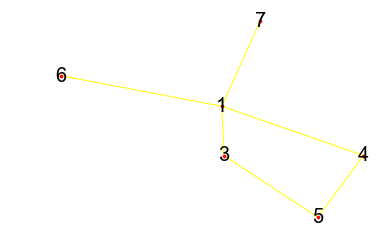

In [14]:
# То же, но добавим ещё подписи к узлам
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')
plt.axis('off') 
plt.show()

## Сетевой анализ

Что мы можем узнать про свой граф?

In [17]:
# число узлов и рёбер

print(G.number_of_nodes())
print(G.number_of_edges())

6
6


**Радиус** — минимальный эксцентриситет среди всех вершин графа.

**Диаметр** — самый длинный путь от одной вершины до другой.

**Коэффициент ассортативности** _\(assortativity coefficient\)_ определяет, с кем связаны "важные" узлы: если с другими "важными" узлами, то значение коэффициента высокое, а если нет – низкое.

**Плотность графа** _\(density\)_ – отношение числа ребер к максимально возможному. В сообществах высокий коэффициент кластеризации и высокая плотность.

In [18]:
# Радиус графа, минимальный эксцентриситет среди всех вершин графа
print(nx.radius(G))

# Диаметр графа, самый длинный путь от одной вершины до другой
print(nx.diameter(G))

# Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах"):
print(nx.degree_pearson_correlation_coefficient(G))

# Плотность графа, отношение рёбер и узлов
print(nx.density(G))

2
3
-0.7333333333333333
0.4


**Степень, или мощность узла** *(degree)* – это количество его связей.

**Взвешенная степень** _\(weighed degree\)_ – это количество связей узла, разделенное на общее количество связей в графе.

Важность узла можно определять разными способами:

* **degree centrality**: у кого больше связей, тот и важнее
* **closeness centrality**: чем центральнее узел \(т.е. чем короче путь от него до всех остальных узлов\), тем он важнее
* **betweenness centrality**: количество кратчайших путей, проходящих через узел
* **eigencentrality**: чем больше друзей у твоих друзей, тем ты важнее

<img src="https://danbi-ncsoft.github.io/assets/works/network_analysis/node_centrality.png" align="left">

In [16]:
# Центральность узлов (важность узлов)

deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

1
3
4
5
6
7


**Коэффициент кластеризации** _\(clustering coefficient\)_ – степень взаимодействия между собой ближайших соседей узла, т.е. вероятность того, что ближайшие соседи узла будут связаны не только с ним, но и между собой.

Так коэффициент кластеризации нулевой:
![clustering coefficient 0](http://evelinag.com/blog/2016/01-25-social-network-force-awakens/clustering0.png)
А так он равен 1:
![clustering coefficient 1](http://evelinag.com/blog/2016/01-25-social-network-force-awakens/clustering1.png)


In [20]:
# вот какой коэффициент у нашего графа:

print(nx.average_clustering(G))
print(nx.transitivity(G))

0.0
0


**Модулярность** _\(modularity\)_ показывает, насколько при заданном разбиении графа на группы плотность связей внутри группы больше плотности связей между группами. С помощью этой метрики граф разбивается на сообщества. 

**Сообщество** – это плотный подграф, где все (или почти все) узлы связаны между собой. 

![](https://focus.ua/files/medvedeva/2016/04/01-11/gofthr.jpg)

In [31]:
from networkx.algorithms import community

com = community.greedy_modularity_communities(G)
print(com)

[frozenset({3, 4, 5}), frozenset({1, 6, 7})]


Что такое `frozenset`? Единственное отличие `frozenset` от `set` заключается в том, что `set` — изменяемый тип данных, а `frozenset` — нет. Примерно похожая ситуация с списками и кортежами.

А вот другой алгоритм для выделения сообществ. [Вот тут](https://networkx.github.io/documentation/latest/reference/algorithms/community.html) описаны все остальные, которые есть.

In [34]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[1, 7], [3, 4, 5], [6]]

## Gephi

[Вот здесь](https://github.com/ancatmara/DL-SFL-2019/blob/master/seminar-13.mdl) чуть больше теории про разнные метрики оценки графов и тьюториал по обработке и визуализации графов в программе Gephi. Она умеет делать вещи намного красивее, чем `matplotlib`, так что можно создать граф с помощью питона, а потом загрузить его в Gephi и считать статистику по графу и визуализировать его уже там.

## Данные для графов

[Тут можно найти](http://konect.uni-koblenz.de/) большую разнообразную коллекцию готовых сетей, с которыми можно поиграть. Например, [здесь лежат](http://konect.uni-koblenz.de/networks/dolphins) результаты наблюдений за дельфинами в  Новой Зеландии (классический граф) — 64 узла (дельфины), 159 связей (если дельфинов часто наблюдали вместе).

Загрузим эти данные и посмотрим, что можно с ними сделать.

In [21]:
import urllib.request
import tarfile

response = urllib.request.urlopen('http://konect.uni-koblenz.de/downloads/tsv/dolphins.tar.bz2')
zipped = response.read()

with open('dolphins.tar.bz2', 'wb') as f:
    f.write(zipped)

В архиве папка dolphins, а в ней 3 файла:

* out.dolphins
* meta.dolphins
* README.dolphins

Нужные нам данные лежат в первом из них. Они представляют собой набор строк, в каждой 2 числа — id дельфинов, которых наблюдали вместе.

In [23]:
# распаковываем архив
tar = tarfile.open("dolphins.tar.bz2")
tar.extractall()
tar.close()

dolphin_G = nx.Graph()

# добавляем узлы и связи в граф
with open('dolphins/out.dolphins') as unzipped:
    for indx, line in enumerate(unzipped):
        if indx:
            line = line.strip()
            node_1, node2 = line.split()
            dolphin_G.add_edge(node_1, node2)

In [24]:
# У этого графа кластерный коэффициент будет уже другим:

print(nx.transitivity(dolphin_G))

0.3087757313109426


In [25]:
# Какой дельфин самый главный в Новой Зеландии? :)

deg_dolphin = nx.degree_centrality(dolphin_G)
i = 0
for nodeid in sorted(deg_dolphin, key=deg_dolphin.get, reverse=True):
    i += 1
    print(nodeid, round(deg_dolphin[nodeid], 3))
    if i == 10:
        break

15 0.197
38 0.18
46 0.18
34 0.164
52 0.164
18 0.148
21 0.148
30 0.148
58 0.148
14 0.131


Теперь нарисуем, возьмёт для разнообразия другой layout. [Вот список](https://networkx.github.io/documentation/latest/reference/drawing.html#layout) всех алгоритмов укладки, которые есть в `networkx`.

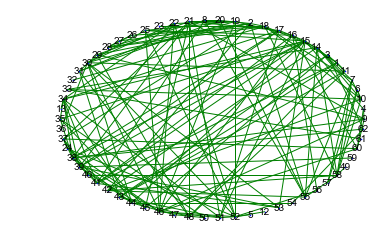

In [27]:
pos = nx.shell_layout(dolphin_G)
nx.draw_networkx_nodes(dolphin_G, pos, node_color='blue', node_size=1) 
nx.draw_networkx_edges(dolphin_G, pos, edge_color='green')
nx.draw_networkx_labels(dolphin_G, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

In [35]:
# Из графа можно извлечь подграф, где будут, например, только интересующие нас узлы:

dolphins_sub = ['15', '38', '46']
sub_G = dolphin_G.subgraph(dolphins_sub)
print(sub_G.number_of_nodes())

3


Там можно найти и другие данные: [сотрудничество джазовых музыкантов друг с другом](http://konect.uni-koblenz.de/networks/arenas-jazz) — 198 узлов (музыканты), 2,742 связи между ними (сотрудничество).  Или [племена Новой Гвинеи](http://konect.uni-koblenz.de/networks/ucidata-gama). И много всего другого. А еще можно скачать граф своих (или чьих-нибудь еще) друзей Вконтакте с помощью [вот этого приложения](https://vk.com/app3861133_4520142). В общем, пространство для экспериментов огромно!

## Графы и лингвистика

[Вот тут постоянно попоплняемая библиография работ о применении графов в лингвистике](https://www.cs.upc.edu/~rferrericancho/linguistic_and_cognitive_networks.html), её можно изучить и сделать что-нибудь великое. Но начнём с простого.

## Задание

Давайте возьмём некоторый большой текст (например, [такой](http://www.adventist.kz/download/education/gom/_plungyan_v.a._-_obstchaya_morfologiya.rar), только не забудьте пересохранить его как plain text), выделим в нём существительные, приведём их к словарной форме и построим граф, в котором все существительные будут связаны между собой в том случае, если они встречались в тексте на расстоянии 3 (или меньше) друг от друга больше 2 раз.

То есть в тексте 

*Произвольность знака, по поводу которой мы выше допускали теоретическую возможность перемены. Углубляясь в вопрос, мы усматриваем, что в действительности самая произвольность знака защищает язык от всякой попытки, направленной к его изменению. Говорящая масса, будь она даже сознательнее, не могла бы обсуждать вопросы языка. Ведь для того чтобы подвергать обсуждению какую-либо вещь, надо, чтобы она отвечала какой-то разумной норме.* 


найдутся существительные *произвольность*, *знак*, *повод*, *возможность*, *перемена*, *вопрос*, *действительность*, *произвольность*, *знак*, *язык*, *попытка*, *изменение*, *масса*, *вопрос*, *язык*, *обсуждение*, *вещь*, *норма*.

На расстоянии 3 от слова *повод* находятся слова *произвольность*, *знак*, *возможность*, *перемена*, *вопрос*.

Теперь давайте узнаем самые центральные существительные в этом графе, его диаметр (можно узнать только если граф связанный), плотность, ассортативность, кластерный коэффициент. Ну и, конечно, нарисуем то, что у нас получилось.
